In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sp
from scipy.optimize import minimize

In [10]:
#P1 load data
dark1 = np.load('dark1.npy')
dark2 = np.load('dark2.npy')
darktrue = np.load('darktrue.npy')

temp1 = np.load('temp1.npy')
print(temp1)
temp2 = np.load('temp2.npy')
temptrue = np.load('temptrue.npy')

[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]


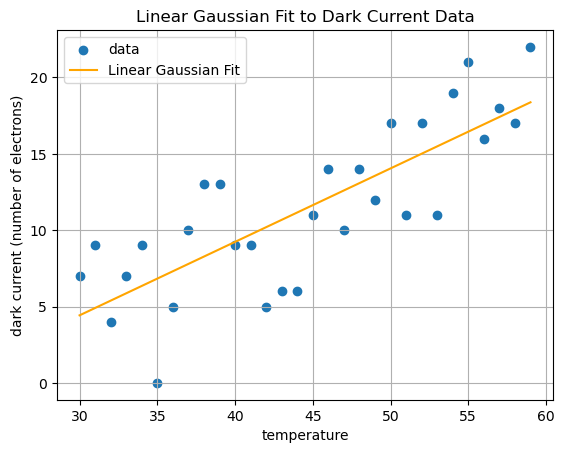

/var/folders/my/2p0xcfbn4z100hsfx3lhh76m0000gp/T/ipykernel_71699/178905069.py:5: RuntimeWarning: overflow encountered in power
  return np.e**(params[0] + params[1]*x)


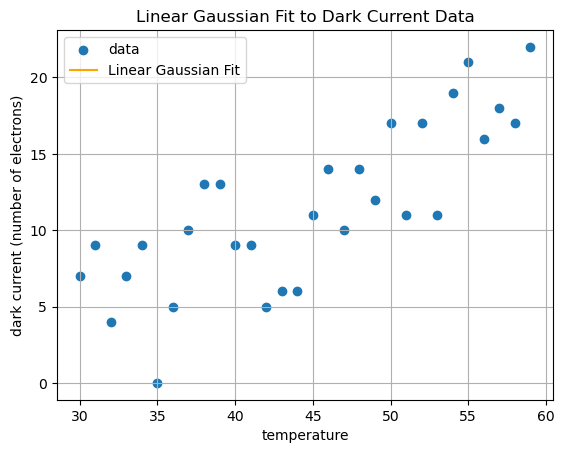

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1705.3007202505823
        x: [-6.563e+02  1.612e+02]
      nit: 11
      jac: [ 2.246e+03  9.158e+03]
 hess_inv: [[ 3.628e+03 -8.898e+02]
            [-8.898e+02  2.182e+02]]
     nfev: 54
     njev: 14


In [44]:
def linear_Model(params,x):
    return params[0] + params[1]*x

def exp_Model(params,x):
    return np.e**(params[0] + params[1]*x)


def Linear_Gauss_obj_funct(params,y,x):
    return np.sum((y - (linear_Model(params,x)))**2)


def Exp_Poisson_obj_funct(params,y,x):
    x2 = np.log(x)
    x3 = exp_Model(params,x2)
    return np.sum((x3*y - (np.e**(x3)))**2)


def Optimize_params(objective_function,Model,name,y,x,params_inital = np.array([1,1])):
    objective_function1 = lambda param: objective_function(param,y,x)
    result = minimize(objective_function1, params_inital, method='BFGS')
    plt.scatter(x,y,label = "data")
    plt.plot(x,Model(result.x,x), label = f"{name} Fit",color = "orange")
    plt.xlabel("temperature")
    plt.ylabel("dark current (number of electrons)")
    plt.title(f"{name} Fit to Dark Current Data")
    plt.grid(True)
    plt.legend()
    plt.show()
    return(result)

Optimize_params(Linear_Gauss_obj_funct,linear_Model,"Linear Gaussian",dark1,temp1)
print(Optimize_params(Exp_Poisson_obj_funct,exp_Model,"Linear Gaussian",dark1,temp1))

0.999998


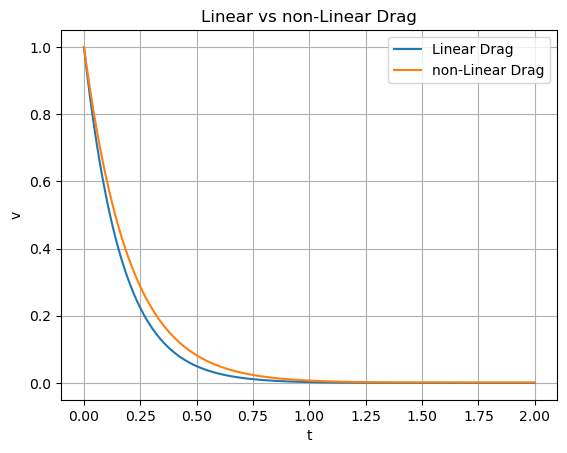

In [ ]:

# P3d
pi = 1
mu = 1
r = 1
v_0 = 1
m = 1

eta2 = 0.00001
mu2 = 5
v_02 = v_0 - (eta2/mu2)
print(v_02)
ts = np.linspace(0,2,1000)
linear_Drag = v_0*np.e**(-(6*pi*mu*r*ts)/m)
nonLin_drag = np.sqrt(v_02*np.e**(-2*mu2*ts/m)+(eta2/mu2) )

plt.plot(ts, linear_Drag, label = "Linear Drag")
plt.plot(ts, nonLin_drag, label = "non-Linear Drag")
plt.xlabel("t")
plt.ylabel("v")
plt.title("Linear vs non-Linear Drag")
plt.grid(True)
plt.legend()